# Assignment 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


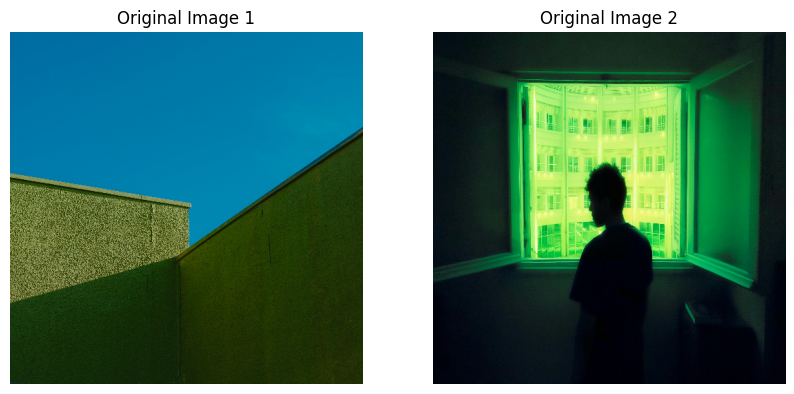

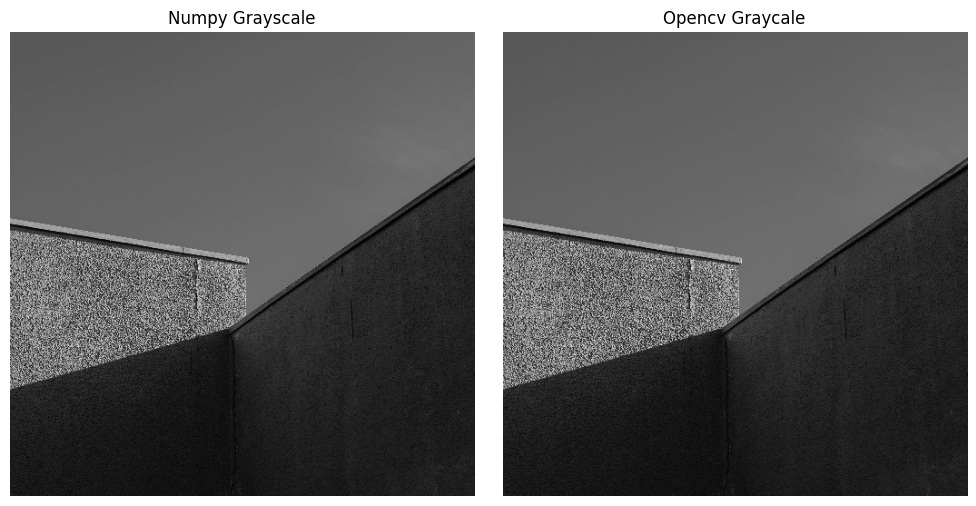

Shape of RGB= (512, 512, 3)
Shape of Grayscale= (512, 512)
[  0. 107. 161.]
0.0 *0.299+ 107.0 *0.587+ 161.0 *0.114= 81


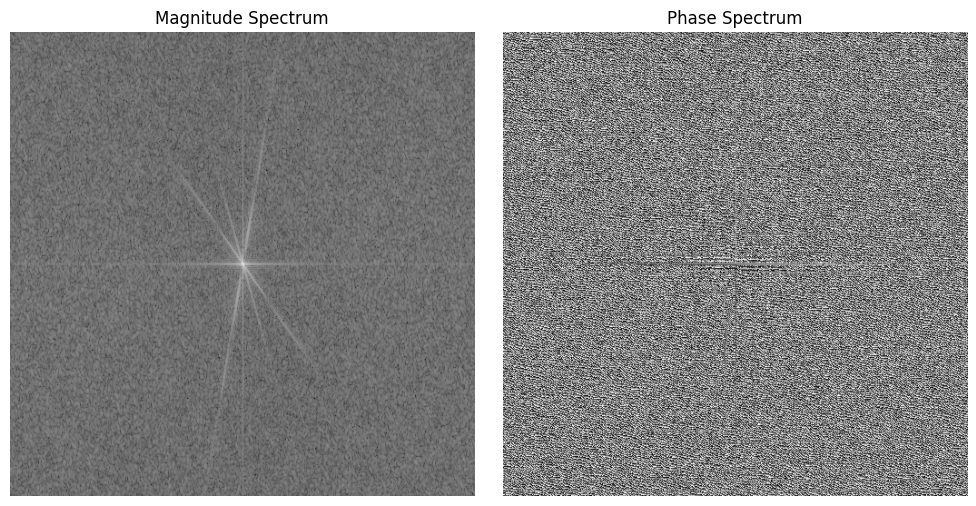

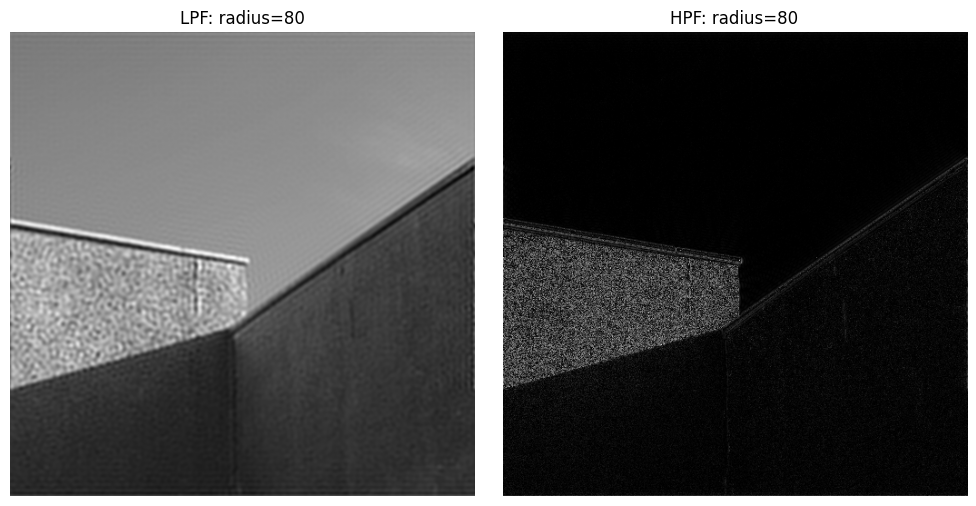

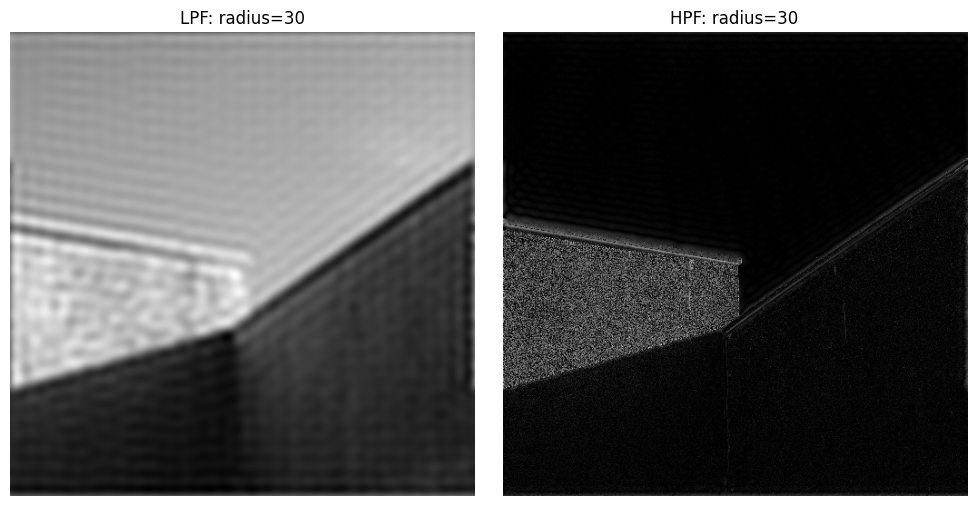

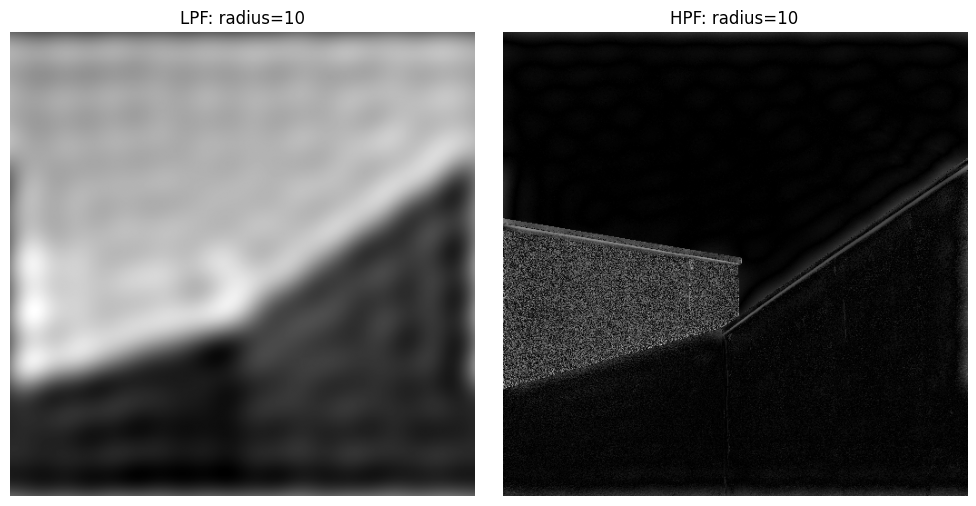

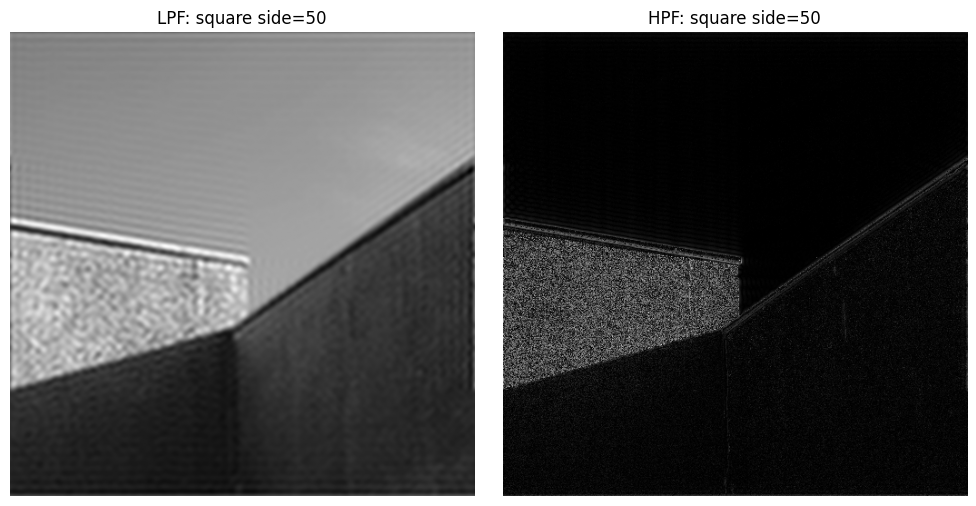

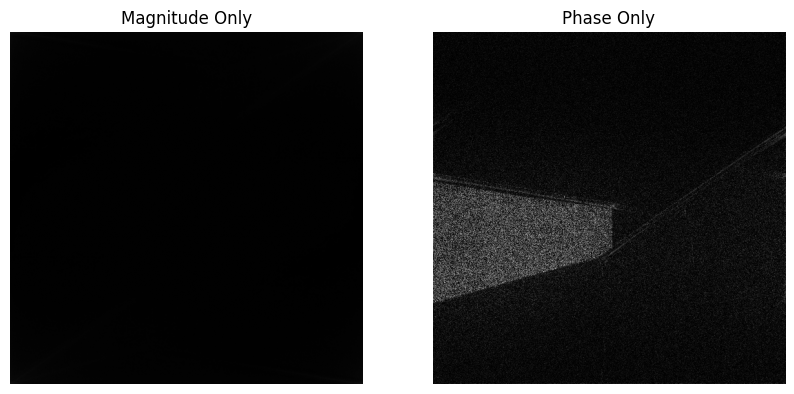

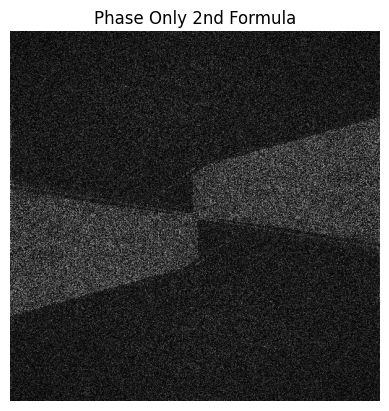

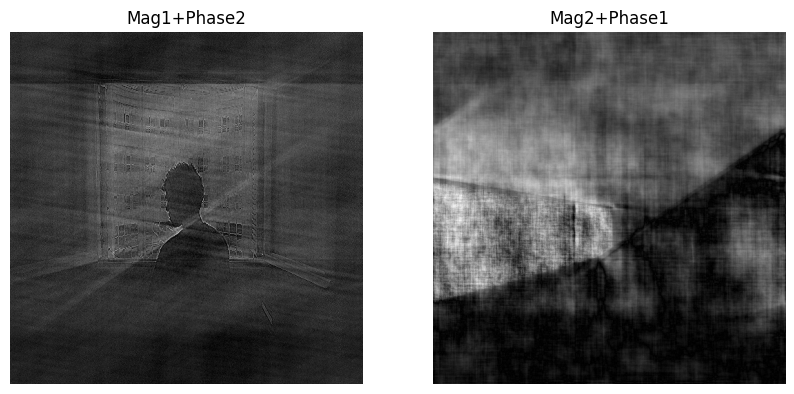

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%run "/content/drive/MyDrive/Colab Notebooks/Copy of Assignment 1.ipynb"

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [2]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

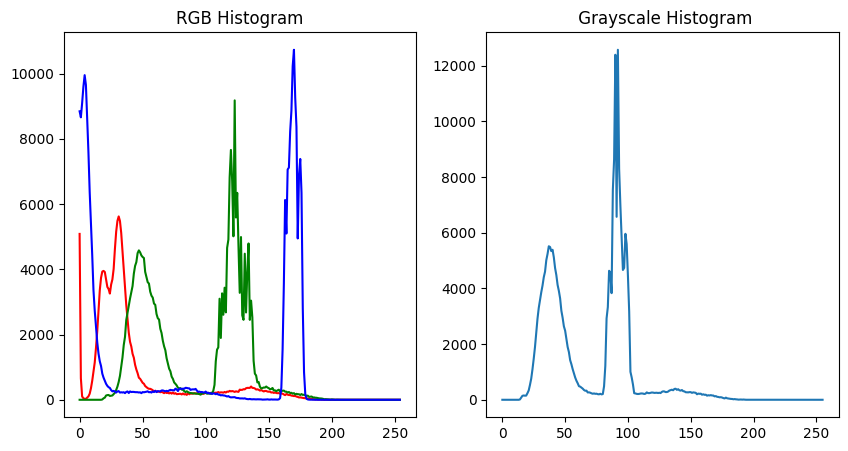

In [3]:
def gray_histogram(gray_img):
  hist=np.zeros(256) #creating numpy array filled with 0
  gray_img_in_one_line=gray_img.ravel() # breaks the 2D array into single line with all the values easy for looping
  for i in gray_img_in_one_line:
    hist[i.astype(np.uint8)] += 1 #adding all frequency to create histogram(note:index has to be converted to integer)
  return hist
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
colors=['r','g','b']
for i in range(3):
  plt.plot(gray_histogram(x[:,:,i])[1:],color=colors[i]) #started this from 1st index because at 0th index red count was 100000 which was hiding the importance of other color peaks
plt.title("RGB Histogram")
plt.subplot(1,2,2)
plt.plot(gray_histogram(gray))
plt.title(" Grayscale Histogram")
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [4]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

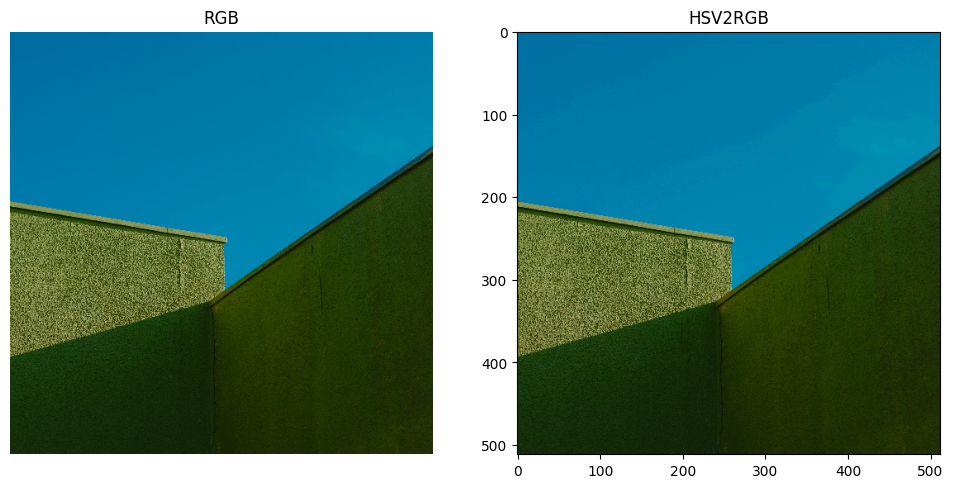

In [14]:
def rgb_to_hsv(img_rgb):
  img_hsv=np.zeros(img_rgb.shape) #making 3D array full of zeroes
  im=img_rgb.astype(float)
  mx=im.max(2) #finding max values amongst the three colors
  df=mx-im.min(2)+1e-7 #just adding a small number so that in fraction it does not create problems also this is delta of max and min
  #calcualted hue using fast if-else(.select in numpy)+multiplied by 30 to scale from 0-180
  img_hsv[:,:,0]=np.select([mx==im[:,:,0],mx==im[:,:,1]],[((im[:,:,1]-im[:,:,2])/df)%6,((im[:,:,2]-im[:,:,0])/df)+2],((im[:,:,0]-im[:,:,1])/df)+4)*30
  #saturation=delta/max + where fucntion checks if incase max is zero then sets saturation=0
  img_hsv[:,:,1]=np.where(mx!=0,(df/mx)*255,0)
  #value is simply the max value amongst rgb
  img_hsv[:,:,2]=mx
  return img_hsv
img_hsv=rgb_to_hsv(x)
img_test=cv.cvtColor(img_hsv.astype(np.uint8),cv.COLOR_HSV2RGB) #Convert float array to uint8 before passing to OpenCV
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(x.astype(np.uint8))
plt.title("RGB")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_test)
plt.title("HSV2RGB")
plt.show()



## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [6]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

#motivation: enhance blue sky vs warm mountain contrast cinematically
#mods: split toning(teal shadows orange brights), contrast adjustment, saturation change

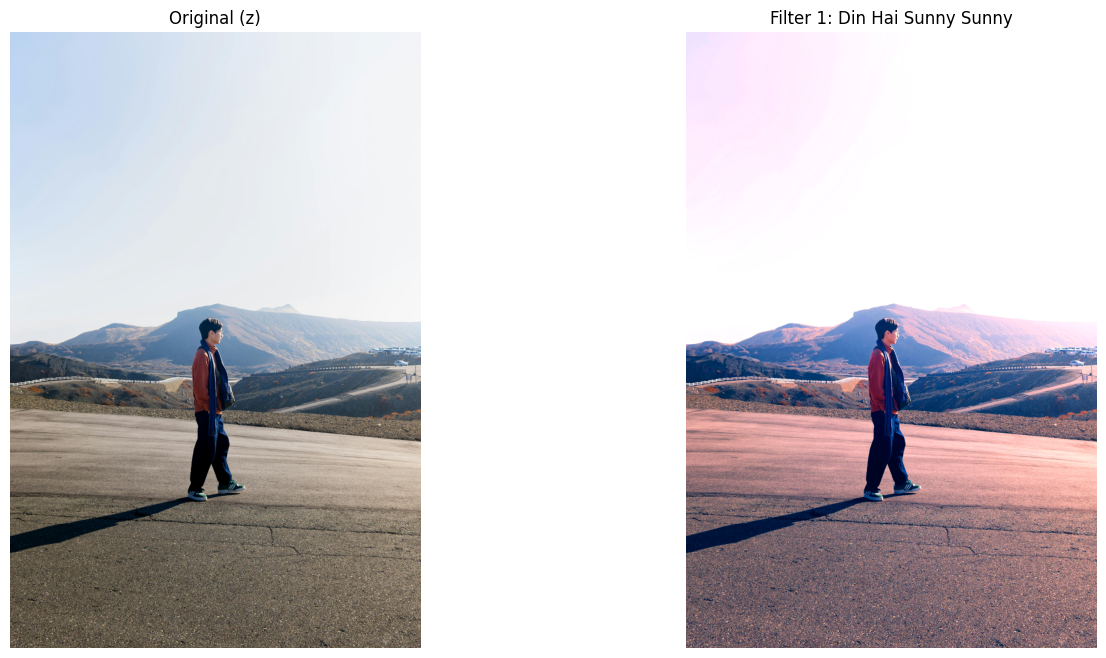

In [7]:
def din_hai_sunny_sunny(img):
    img_f=img.astype(np.float32)/255.0  #float conversion
    #split channels bgr
    b,g,r=cv.split(img_f)
    #shadows push to teal
    b=b+(1.0-b)*0.2  #adding colors inversely proportional to blue to add contrast
    g=g+(1.0-g)*0.1
    r=r+(r)*0.2 # adding tones of red itself to make it brighter
    merged=cv.merge((b,g,r))
    merged=np.clip((merged-0.5)*1.2+0.5,0,1) #linealy adjusting contrast
    #hsv saturation adjustment
    hsv=cv.cvtColor((merged*255).astype(np.uint8),cv.COLOR_BGR2HSV).astype(np.float32)
    hsv[:,:,1]=np.clip(hsv[:,:,1]*1.3,0,255)  #pixels should not go over 255
    final=cv.cvtColor(hsv.astype(np.uint8),cv.COLOR_HSV2BGR)
    return final
#load image as z (opencv loads bgr)
z=cv.imread('image2.jpg')
#apply filters to z
out1_bgr=din_hai_sunny_sunny(z)
#convert all to rgb for matplotlib display
z_rgb=cv.cvtColor(z,cv.COLOR_BGR2RGB)
out1_rgb=cv.cvtColor(out1_bgr,cv.COLOR_BGR2RGB)
#plotting side by side
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(z_rgb)
plt.title("Original (z)")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(out1_rgb)
plt.title("Filter 1: Din Hai Sunny Sunny")
plt.axis('off')
plt.show()

#motivation: make image look cold and frozen like winter mountain
#mods:channel mixing, saturation change, gamma correction

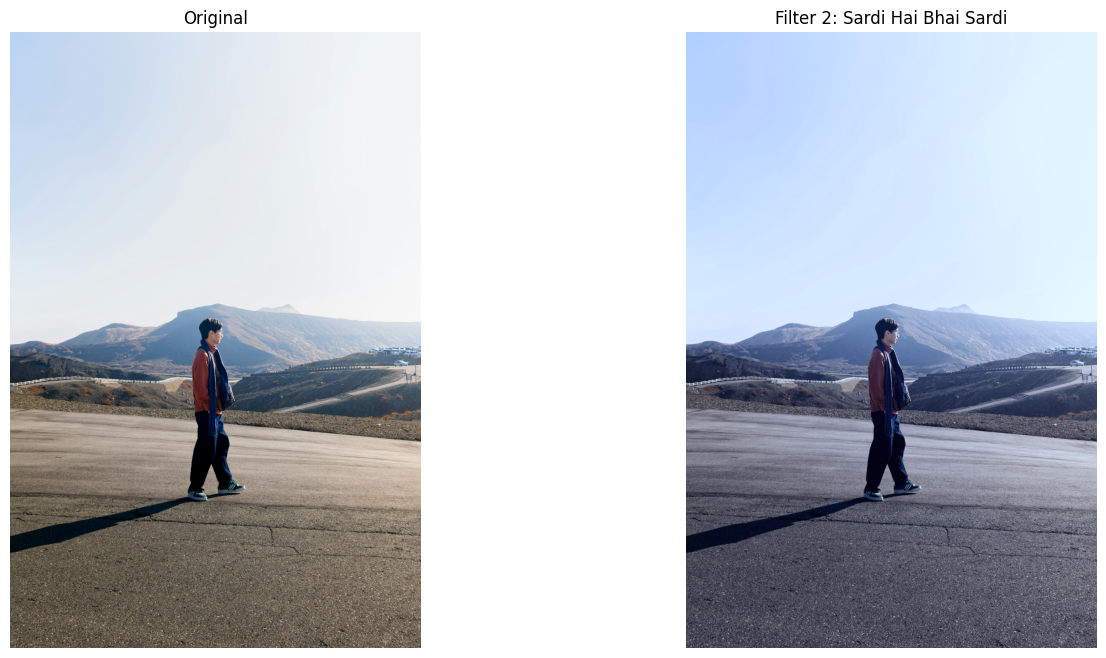

In [8]:
def Sardi_Hai_bhai_sardi(img):
    img_f=img.astype(np.float32)/255.0  #convert to float 0-1
    b=img_f[:,:,0]
    g=img_f[:,:,1]
    r=img_f[:,:,2]
    #add blue color to make it cold
    b=b+0.15
    #reduce red color a little
    r=r*0.9
    #stack channels back
    merged=np.dstack((b,g,r))
    #make gray version by averaging channels
    gray=np.mean(merged,axis=2)
    #mixing gray
    gray_3c=np.dstack((gray,gray,gray))
    #mix color image and gray image to fade colors (desaturate)
    #0.6 is color part, 0.4 is gray part
    final_blend=merged*0.6 + gray_3c*0.4
    #make contrast high using power math
    #this makes dark parts sink down
    final_blend=np.power(final_blend, 1.2)
    final=np.clip(final_blend*255,0,255).astype(np.uint8) #pixels should not go over 255
    return final
out2_bgr=Sardi_Hai_bhai_sardi(z)
out2_rgb=cv.cvtColor(out2_bgr,cv.COLOR_BGR2RGB)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(z_rgb)
plt.title("Original")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(out2_rgb)
plt.title("Filter 2: Sardi Hai Bhai Sardi")
plt.axis('off')
plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [9]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

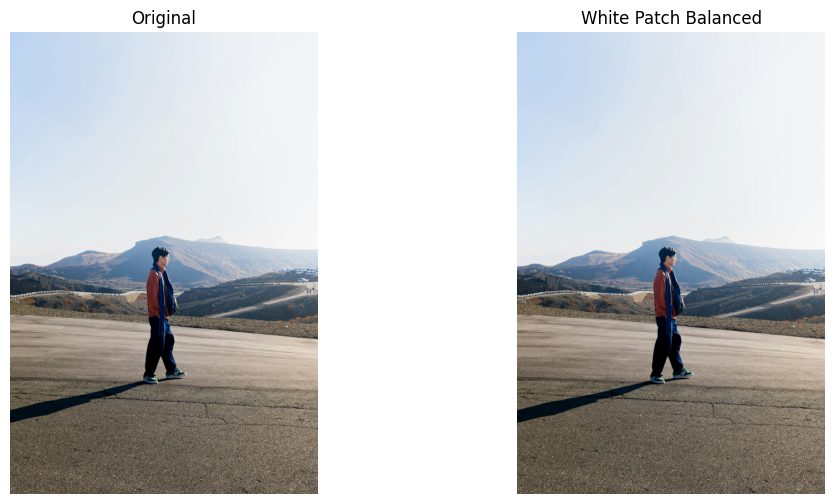

In [18]:
def white_patch_balance(img_rgb):
    img_f=img_rgb.astype(np.float32)
    #finding the brightest pixel
    max_vals=np.max(img_f,axis=(0,1))
    #finding the factor to scale (note:added a small number so that if max is zero then fraction is still valid)
    scale=255.0/(max_vals+1e-7)
    #scaling by that factor
    balanced=img_f*scale
    return np.clip(balanced,0,255).astype(np.uint8) #pixels should not go over 255
z_balanced=white_patch_balance(z_rgb)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(z_rgb.astype(np.uint8))
plt.title("Original")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(z_balanced)
plt.title("White Patch Balanced")
plt.axis('off')
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [11]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

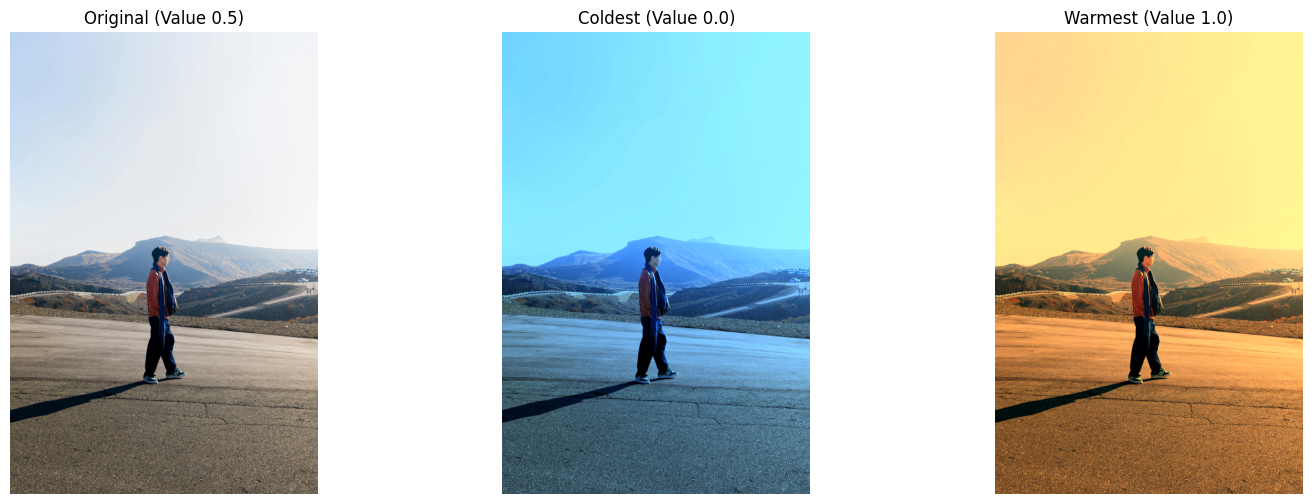

In [20]:
def white_balance(img_rgb, value):
    img_f=img_rgb.astype(np.float32)
    #-1(cold) to +1(warm)
    temp=(value-0.5)*2
    #(0.4 means max 40% change)
    strength=0.4
    #if temp is positive (warm),red increases and blue decreases and vice versa
    r_scale=1.0+(temp*strength)
    b_scale=1.0-(temp*strength)
    #apply scaling to red and blue
    img_f[:,:,0]=img_f[:,:,0]*r_scale
    img_f[:,:,2]=img_f[:,:,2]*b_scale
    return np.clip(img_f,0,255).astype(np.uint8) #pixels should not go over 255
cold_ver=white_balance(z_rgb, 0.0) #(Coldest)
warm_ver=white_balance(z_rgb, 1.0) #(Warmest)
#display original vs cold vs warm
plt.figure(figsize=(18,6))
plt.subplot(1,3,1);plt.imshow(z_rgb);plt.title("Original (Value 0.5)");plt.axis('off')
plt.subplot(1,3,2);plt.imshow(cold_ver);plt.title("Coldest (Value 0.0)");plt.axis('off')
plt.subplot(1,3,3);plt.imshow(warm_ver);plt.title("Warmest (Value 1.0)");plt.axis('off')
plt.show()